In [1]:
## Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
url = r'https://raw.githubusercontent.com/natthawit-jan/car_price_prediction_proj/master/Car_Purchasing_Data.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [5]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


Rename the column of gender to is_male, where 1 indicates male and female otherwise

In [6]:
df.rename(columns={'Gender': 'Is_Male'}, inplace=True)

In [7]:
df.head()

,Customer Name,Customer e-mail,Country,Is_Male,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


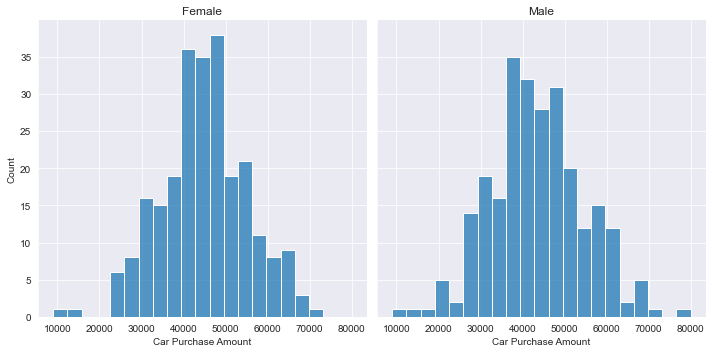

In [8]:
d = sns.displot(data=df, x="Car Purchase Amount", col="Is_Male",)
d.axes[0][0].set_title('Female')
d.axes[0][1].set_title('Male')
plt.show()

In [9]:
cols = [name for name in df.select_dtypes('number').columns if name != 'Car Purchase Amount']
P = df.corr().drop(columns=cols, index='Car Purchase Amount').T

/var/folders/p8/ysh15_5n5w78sss0_9ywmvyw0000gn/T/ipykernel_51328/2546831319.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  P = df.corr().drop(columns=cols, index='Car Purchase Amount').T


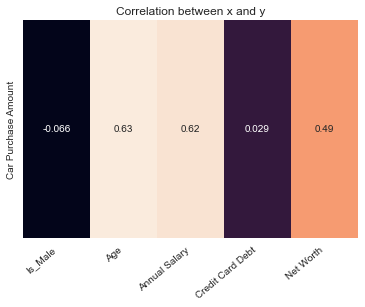

In [10]:
ax = sns.heatmap(P, annot=True, cbar=False)
ax.set_title('Correlation between x and y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

 Correlation between all dataset to see if X are related to each other (Multicorrlinearlity)

/var/folders/p8/ysh15_5n5w78sss0_9ywmvyw0000gn/T/ipykernel_51328/1950817817.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cbar=False, )


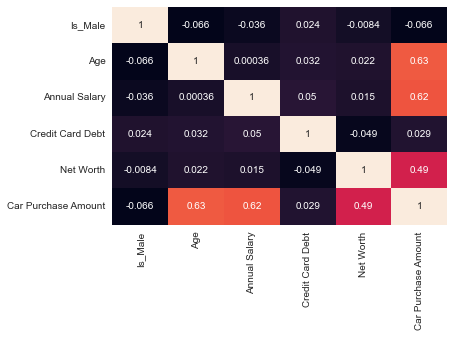

In [11]:
sns.heatmap(df.corr(), annot=True, cbar=False, )
plt.show()

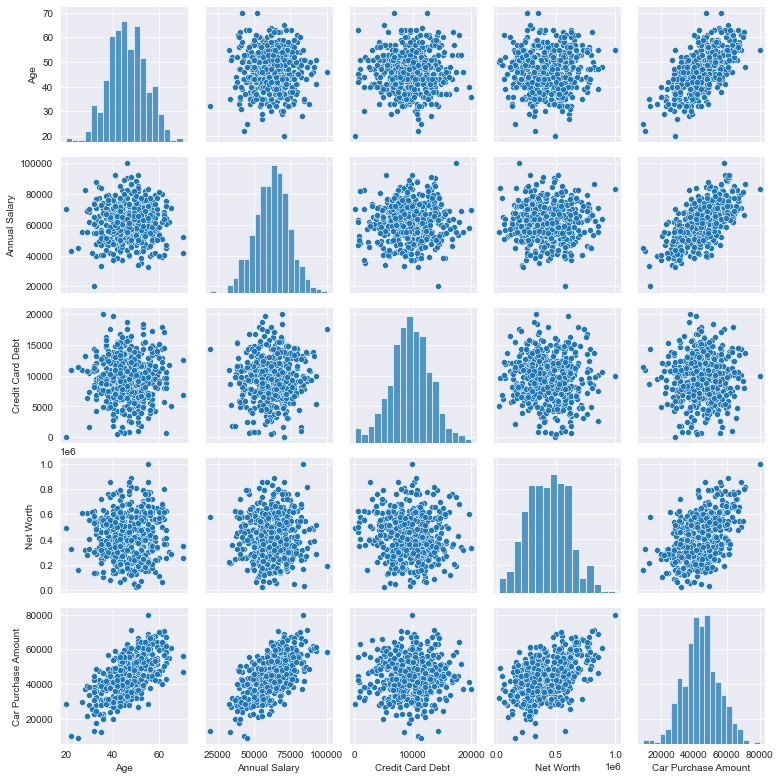

In [12]:
sns.pairplot(data=df.drop(columns=['Is_Male']), height=2.2)

In [13]:
## Drop Country column since only USA is present
if 'Country' in df.columns:
    df.drop(columns='Country', inplace=True)
if 'Customer Name' in df.columns:
    df.drop(columns='Customer Name', inplace=True)

Choose to see the plots for only 3 looking-like linear feature (Age, Net Worth and Annual Salary)

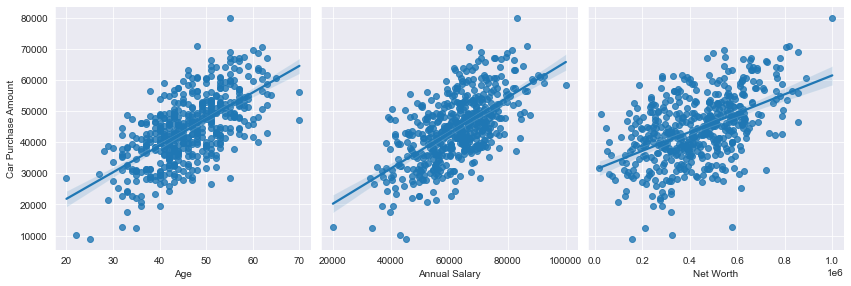

In [14]:
x_elements = ['Age', 'Annual Salary', 'Net Worth']
y_elements = 'Car Purchase Amount'
sns.pairplot(data=df, x_vars=x_elements, y_vars=y_elements, kind="reg", height=4, )

 Therefore, looking from the plots, we can see that there are mainly 3 features that look linear and can be used to train the model. *Age*, *Net Worth* and *Annual Salary*
 At first trial, we will include all the features to our model to see if this will give good results


Define X and y for the model

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

### Standardize the data

In [16]:
y = ['Car Purchase Amount']
x_features = ['Age', 'Annual Salary', 'Net Worth']
data = df[x_features + y]

In [17]:

ct = ColumnTransformer(
    [("Features", StandardScaler(), x_features),
     ("Car price Amount", StandardScaler(), y)
     ], verbose_feature_names_out=False)
p = ct.fit_transform(data)

sub_df = pd.DataFrame(p, columns=ct.get_feature_names_out())

X = sub_df[x_features]
y = sub_df[y]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
print(f'The intercept b0 = {model.intercept_}')


The intercept b0 = [-0.00079873]


In [21]:
for ind, coeff in enumerate(model.coef_.T):
    print(f'The value of b{ind+1} {X.columns.values[ind]} = {coeff}')
    ind += 1

The value of b1 Age = [0.62134389]
The value of b2 Annual Salary = [0.61158335]
The value of b3 Net Worth = [0.46564413]


In [22]:
y_pred = model.predict(X_train)

Calculate Mean Error on the *train* data

In [23]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_train, y_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

MAE: 0.01979898453847611
MSE: 0.0005104448214901311
RMSE: 0.022593025948069265


$ R^2 $ calculation

In [24]:
R_2_for_test_data = model.score(X_test, y_test)
print(f'R2 score for the test data is {R_2_for_test_data}')

R2 score for the test data is 0.999501773385224


Calculate Mean Error on the *test* data

In [25]:
y_pred = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.01903290141350105
MSE: 0.0004985479913973257
RMSE: 0.022328188269479583


In [26]:
X_With_Constant = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_With_Constant).fit()
sm_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Car Purchase Amount   R-squared:                       0.999
Model:                             OLS   Adj. R-squared:                  0.999
Method:                  Least Squares   F-statistic:                 2.246e+05
Date:                 Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                         14:44:52   Log-Likelihood:                 829.91
No. Observations:                  350   AIC:                            -1652.
Df Residuals:                      346   BIC:                            -1636.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0008      0.001     -0.657      0.512      -0.003       0.002
Age               0.6213      0.001    504.837      0.000       0.619       0.624
Annual Salary     0.6116      0.001    509.779      0.000       0.609       0.614
Net Worth         0.4656      0.001    384.950      0.000       0.463       0.468
==============================================================================
Omnibus:                      257.107   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.630
Skew:                          -0.075   Prob(JB):                     1.22e-05
Kurtosis:                       1.763   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### PLAY WITH THE MODEL

In [50]:
x_transformer = ct.named_transformers_['Features']
y_transformer = ct.named_transformers_['Car price Amount']

AGE = 40
SALARY = 302930
NETWORTH = 349204


x = pd.DataFrame([[AGE, SALARY, NETWORTH]], columns= ['Age', 'Annual Salary', 'Net Worth'])

x_to_predict = x_transformer.transform(x) # Transform the x to standardized x

predicted_amount = model.predict(x_to_predict) # Predict

print(f'Predicted Amount = {y_transformer.inverse_transform(predicted_amount)[0][0]}')


Predicted Amount = 172174.5194450153


/Users/natthawit/local/pyenv/natthawit_py/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
